<a href="https://colab.research.google.com/github/yulingchen628/10901ML/blob/main/ML_HW05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
X = digits.data
Y = digits.target

In [4]:
print(X)
print(Y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [5]:
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

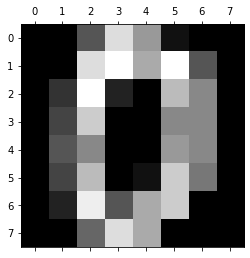

In [6]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [7]:
from sklearn.cluster import KMeans

In [8]:
nb_clusters = [2,3,5,6,7,8,9,10]
inertias = []
for n in nb_clusters:
    km = KMeans(n_clusters=n)
    km.fit(X)
    inertias.append(km.inertia_)

In [9]:
inertias

[1914619.617550103,
 1730182.2600869092,
 1498807.7875016136,
 1409275.6129042385,
 1336466.464726202,
 1265051.0639916696,
 1202308.3741174198,
 1165176.5563059822]

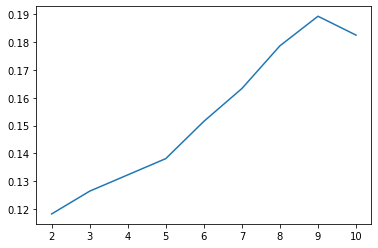

In [10]:
from sklearn.metrics import silhouette_score
avg_silhouettes = []
for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Yk = km.fit_predict(digits.data)
    avg_silhouettes.append(silhouette_score(digits.data, Yk))
plt.plot(nb_clusters, avg_silhouettes)

In [11]:
avg_silhouettes

[0.11832841100655983,
 0.12649498093440542,
 0.13816386551430007,
 0.1515184839706493,
 0.1632895200843049,
 0.17861503863909467,
 0.18920824569561484,
 0.18244527434009825]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

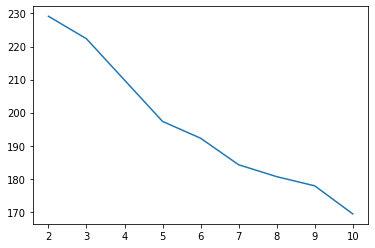

In [12]:
from sklearn.metrics import calinski_harabaz_score
ch_scores = []
for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Yk = km.fit_predict(digits.data)
    ch_scores.append(calinski_harabaz_score(digits.data, Yk))
plt.plot(nb_clusters, ch_scores)

In [13]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score

KMeans

In [14]:
km = KMeans(n_clusters=10)
Yk = km.fit_predict(digits.data)
print('KMeans')
print('Homogeneity score:',homogeneity_score(Y, Yk))
print('Completeness_score:',completeness_score(Y, Yk))
print('Adjusted_rand_score:',adjusted_rand_score(Y, Yk))

KMeans
Homogeneity score: 0.7411608379835462
Completeness_score: 0.7501932303917956
Adjusted_rand_score: 0.6697763561710253


DBSCAN

In [15]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.1)
Yp = dbs.fit_predict(digits.data)
print('DBSCAN')
print('Homogeneity score:',homogeneity_score(Y, Yp))
print('Completeness_score:',completeness_score(Y, Yp))
print('Adjusted_rand_score:',adjusted_rand_score(Y, Yp))

DBSCAN
Homogeneity score: 3.616394280070181e-17
Completeness_score: 1.0
Adjusted_rand_score: 0.0


SuperClustering

In [16]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=10, affinity='nearest_neighbors')
Ys = sc.fit_predict(digits.data)
print('SpectralClustering')
print('Homogeneity score:',homogeneity_score(Y, Ys))
#print('calinski harabaz score:',calinski_harabaz_score(Y,Yk))
print('Completeness_score:',completeness_score(Y, Ys))
print('Adjusted_rand_score:',adjusted_rand_score(Y, Ys))

SpectralClustering
Homogeneity score: 0.831690618469579
Completeness_score: 0.8766144929016136
Adjusted_rand_score: 0.7564608880380487


AgglomerativeClustering

In [19]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=10, linkage='complete')
Y_ac = ac.fit_predict(digits.data)


In [20]:
print('AgglomerativeClustering')
print('Homogeneity_score::',homogeneity_score(Y, Y_ac))
print('completeness_score:',completeness_score(Y, Y_ac))
print('adjusted_rand_score:',adjusted_rand_score(Y, Y_ac))

AgglomerativeClustering
Homogeneity_score:: 0.5905493882538358
completeness_score: 0.6377720419796353
adjusted_rand_score: 0.4286888142937745
